In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

Data Generation
===

In [67]:
np.random.seed(10)
P, Q = (np.random.rand(i, 2) for i in (4, 5))
P_big, Q_big = (np.random.rand(i, 80) for i in (100, 120))

print(P, "\n\n", Q)
# print(P_big, "\n\n", Q_big)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [109]:
def naive(P, Q):
    """
    A naive solution for finding pairvise distances between poins in P and Q
    
    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p*q,)
        
    >>> naive(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    p = P.shape[0]
    q = Q.shape[0]
    D = np.asarray([np.zeros(q)]*p)
    for r in range(p):
        for c in range(q):
            D[r,c] = np.sqrt( np.sum(( P[r] - Q[c] )**2 )  )
    return D
    
naive(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))    
naive(P_big, Q_big)
test(naive)

✅ Your `naive` passed 1 tests.


### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [31]:
rows, cols = np.indices((P.shape[0], Q.shape[0]))
print(rows, end="\n\n")
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [32]:
print(P[rows.ravel()], end="\n\n")
print(Q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [54]:
def with_indices(P, Q):
    """
    An optimized solution using matching indices
    
    Args:
        P: numpy array of shape=(p, 2)
        Q: numpy array of shape=(q, 2)
    Returns:
        D: numpy array of shape=(p*q,)
        
    >>> with_indices(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
    array([[2.82842712, 5.65685425]])
    """
    
    rows, cols = np.indices((P.shape[0], Q.shape[0]))
    P_r = P[rows.ravel()]
    Q_r = Q[cols.ravel()]

    
    D = np.sqrt([np.sum(np.square(P_r - Q_r), axis=1)])
    return D
    
with_indices(np.array([[0, 1]]), np.array([[2, 3], [4, 5]]))
test(with_indices)

✅ Your `with_indices` passed 1 tests.


### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [55]:
from scipy.spatial.distance import cdist


def scipy_version(P, Q):
    return cdist(P, Q)

### Numpy Magic

In [56]:
def tensor_broadcasting(P, Q):
    return np.sqrt(np.sum((P[:, np.newaxis, :] - Q[np.newaxis, :, :]) ** 2, axis=2))

# Compare methods

In [111]:
methods = [
    naive,
    #naive_2,
    with_indices,
    # with_indices_2,
    scipy_version,
    tensor_broadcasting,
]
timers = []
for f in methods:
    print(f.__name__)
    r = %timeit -o f(P_big, Q_big)
    timers.append(r)

<function naive at 0x7f83bedf53a0>
112 ms ± 2.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
<function with_indices at 0x7f83e80b53a0>
19.6 ms ± 551 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
<function scipy_version at 0x7f83e80b5ee0>
487 µs ± 9.44 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
<function tensor_broadcasting at 0x7f83e85076a0>
3.25 ms ± 93.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


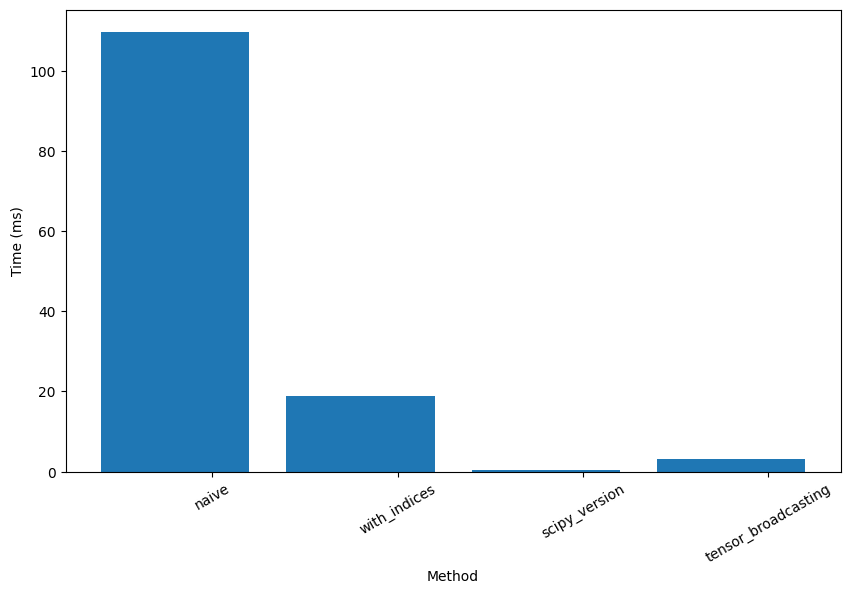

In [112]:
plt.figure(figsize=(10, 6))
plt.bar(
    np.arange(len(methods)), [r.best * 1000 for r in timers], log=False
)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods)) + 0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel("Method")
plt.ylabel("Time (ms)")
plt.show()